Linear Regression with Python scikit Learn

In this section we will see how the Python scikit-Learn library for machine learning can be used to implement Regression functions.We will start 
with simple linear regression involving two variables.

Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they 
studied. This is a simple linear regression task as it invoves just two variables.

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading dara from remote link
url = "https://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
s_data.shape

(25, 2)

In [ ]:
s_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for null values

In [ ]:
s_data.isna().sum()

Hours     0
Scores    0
dtype: int64

Exploratory Data Analysis (EDA)


Visualizing with scatter plot

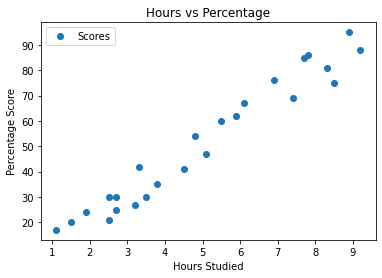

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.legend()
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score


Visualizing using histogram

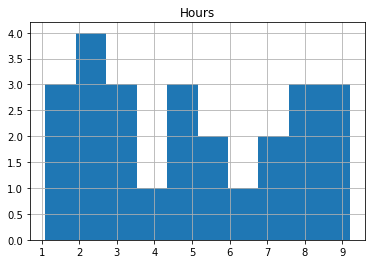

In [ ]:
plt.hist(s_data["Hours"])
plt.title("Hours")
plt.grid()
plt.show()

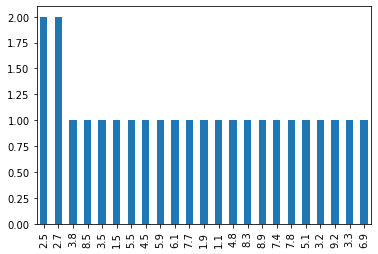

In [ ]:
s_data.Hours.value_counts().plot(kind='bar')

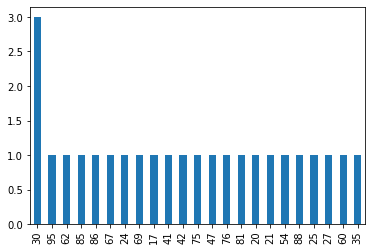

In [ ]:
s_data.Scores.value_counts().plot(kind='bar')

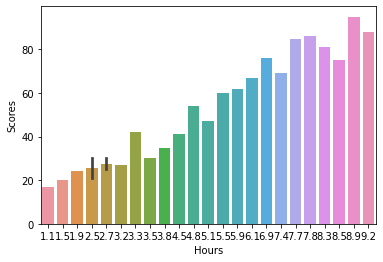

In [ ]:
sns.barplot(x="Hours",y="Scores",data=s_data)

Checking for Outlier Values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


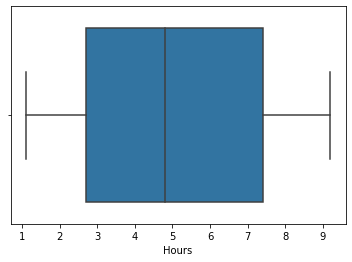

In [ ]:
sns.boxplot(s_data["Hours"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


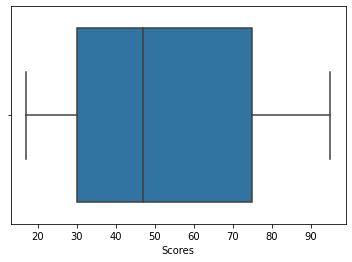

In [ ]:
sns.boxplot(s_data["Scores"])

From above boxplot representation, it is clear that there are no outlier values in the data 

Correlation

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


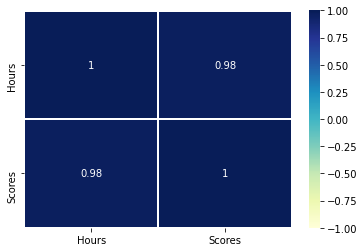

In [ ]:
cor_mat= s_data.corr()    #correlation using heatmap representation    
print(cor_mat)           
sns.heatmap(cor_mat,vmax=1, vmin=-1, annot=True, linewidths=1.5, cmap="YlGnBu")

From above correlation matrix, It is clear that Hours and Scores are strongly correlated 

Visualizing using basic line plot

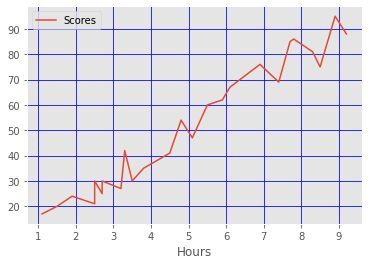

In [ ]:
from matplotlib import style
style.use("ggplot")
df = s_data.sort_values(["Hours","Scores"])
df.plot(x="Hours",y="Scores")
plt.grid(True,color="blue")
plt.show()

In [ ]:
from sklearn import preprocessing
a= np.array(s_data['Scores'])
normalized_a = preprocessing.normalize([a])
normalized_a

array([[0.07351425, 0.1645319 , 0.09451833, 0.26255091, 0.10502036,
        0.07001358, 0.30805973, 0.21004073, 0.28355498, 0.08751697,
        0.29755769, 0.21704208, 0.14352783, 0.14702851, 0.05951154,
        0.33256448, 0.10502036, 0.08401629, 0.23454548, 0.24154683,
        0.10502036, 0.18903665, 0.12252376, 0.26605159, 0.30105837]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


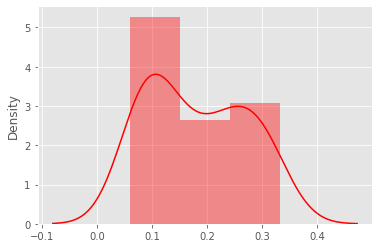

In [ ]:
sns.distplot(normalized_a,color="r")   

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(s_data)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.04166667 1.01686527]
 [1.01686527 1.04166667]]


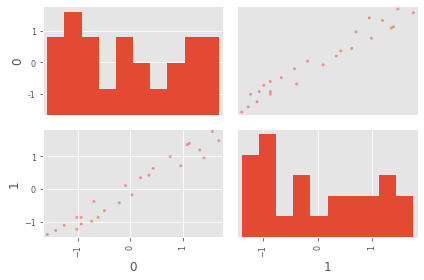

In [ ]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

Preparing the data

Dividing the data info attributes (Inpurs) and labels (Outputs)

In [ ]:
X = s_data["Hours"]
y = s_data["Scores"]

In [ ]:
X=X.values.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

Splitting the data into training and test sets

Now we have our attributes and labels, gence, next step is to splot the data into training and test sets. We will do this by using Scikit-Learn's built-in train_test_split() method 

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Training the Algoritham

We have split our data into training and testing sets, and next step is to train our algoritham.

Using Linear Regression for modelling

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [ ]:
regressor.coef_

array([9.91065648])

In [ ]:
regressor.intercept_

2.018160041434662

Making Predictions

Since we have trained our algoritham, now we have to do some predictions.

In [ ]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing Actual Vs Predicted

In [ ]:
Results = pd.DataFrame(columns=["Hours","Actual","Predicted"])
Results["Actual"]= y_test
Results["Predicted"] = y_pred
Results["Hours"] = X_test
Results=Results.reset_index()
Results


,index,Hours,Actual,Predicted
0,5,1.5,20,16.884145
1,2,3.2,27,33.732261
2,19,7.4,69,75.357018
3,16,2.5,30,26.794801
4,11,5.9,62,60.491033


Visualizing Training Dataset Results

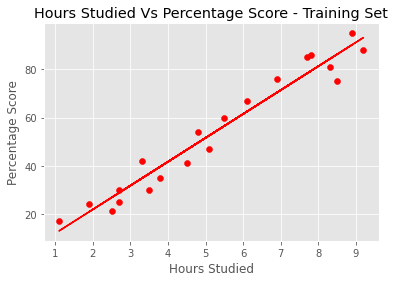

In [ ]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="red")
plt.title("Hours Studied Vs Percentage Score - Training Set")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

Visualising Testing Dataset Results

What will be the predicted score if a student studies for 9.25 hrs/day?

In [ ]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


Evaluating The Model

The metrics here we use to evaluate regression model are:
       

Mean Absoluate Error,

Mean Square Error,
       

Root Mean Square Error

In [ ]:
from sklearn import metrics
import math
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_pred,y_test))

Mean Absolute Error :  4.183859899002982


In [ ]:
print("Mean Square Error :",metrics.mean_absolute_error(y_pred,y_test))
print()
print("Root Mean Square Error :",math.sqrt(metrics.mean_absolute_error(y_pred,y_test)))

Mean Square Error : 4.183859899002982

Root Mean Square Error : 2.0454485813637513


Calculating Training Error

In [ ]:
y_pred_training = regressor.predict(X_train)
print("Root Mean Square Error :",math.sqrt(metrics.mean_absolute_error(y_pred_training,y_train)))

Root Mean Square Error : 2.277411185794162


Checking R^2 (Coefficient of determination) regression score function

R squared is a measure of how close the data are to the fitted regression line.

It is also known as coefficient of determination or coefficient of multiple determination for multiple regression.

Best possible score is 1.0

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105354